In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import itertools
import math
import os
import matplotlib as mpl
plt.ion()

In [2]:
# random mask
w, h = 10, 10
m = np.random.randint(0,2,size=(w,h))

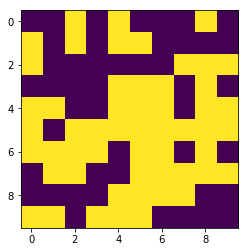

In [3]:
plt.imshow(m) # assume m is the pattern we want

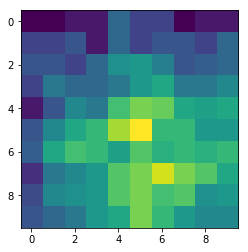

In [4]:
c = signal.convolve2d(m, m, mode="same") # assume our filter is exacting m, which should be perfect
plt.imshow(c)

T = 0.005 # percentage activate

percent overlapping with the actual filter: 100 


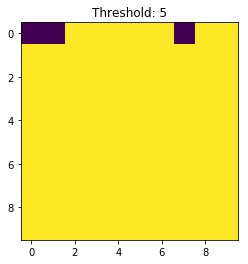

percent overlapping with the actual filter: 94 


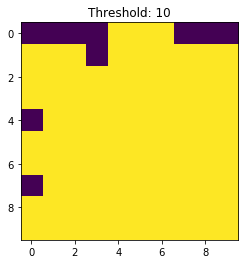

percent overlapping with the actual filter: 68 


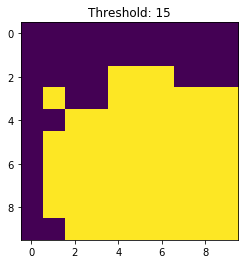

percent overlapping with the actual filter: 61 


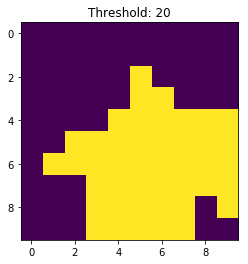

percent overlapping with the actual filter: 29 


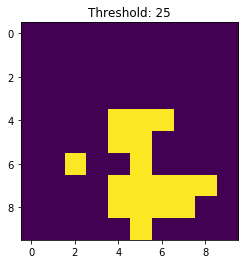

In [5]:
# show the convolved array at different threshold
for i in [5, 10, 15, 20, 25]:
    plt.title("Threshold: %d" % i)
    mask = (c >= i)
    print("percent overlapping with the actual filter: %d " % ((mask * m).sum() / m.sum() * 100) )
    plt.imshow(mask)
    plt.show()

This shows that calculating overlapping regions is really flawed. That is using this criteria for measuring percent overlapping may be wrong.

# shapes and colors for ID

In [19]:
shapes = ['circle', 'rectangle1', 'rectangle2', 'square', 'triangle1', 'triangle2', 'triangle3', 'pentagon']
colors = ['green', 'yellow', 'black', 'red', 'brown', 'orange', 'blue', 'aqua', 'grey', 'violet', 'lawngreen', 
          'olive', 'plum']
rotations = [-10, 0, 10]
trans_x = [-0.3, 0, 0.3]
trans_y = trans_x
scales = [0.3, 0.6]

base1 = len(colors) * len(scales) * len(trans_x) * len(trans_y) # circle
base2 = (len(shapes)-1) * len(colors) * len(scales) * len(trans_x) * len(trans_y) * len(rotations)
print('total %d concepts' % (base1 + base2))

total 5148 concepts


In [20]:
count = 0
for shape, tx, ty, c, s in itertools.product(shapes, trans_x, trans_y, colors, scales):
    for r in rotations:
        count += 1
        if shape == 'circle':
            break
        
total_count = count

5148


In [21]:
count =  0
for shape, tx, ty, c, s in itertools.product(shapes, trans_x, trans_y, colors, scales):
    for r in rotations:
        count += 1
        text = "shape: %s, r: %d, c: %s, tr: (%.1f, %.1f), s: %.1f" % (shape, r, c, tx, ty, s) 
        if count % 100 == 0:
            print("progress: %d/%d" % (count, total_count))
        if shape == 'circle':
            shapelet = plt.Circle((tx, ty), radius=s, fc=c)
        elif shape == 'rectangle1':
            shapelet = plt.Rectangle((tx-0.5*s, ty-s), s, 2*s, fc=c)
        elif shape == 'rectangle2':
            shapelet = plt.Rectangle((tx-s, ty-0.5*s), 2*s, s, fc=c)
        elif shape == 'square':
            shapelet = plt.Rectangle((tx-s, ty-s), 2*s, 2*s, fc=c)
        elif shape == 'triangle1':
            points = [[tx-s, ty-s], [tx+s, ty-s], [tx+s, ty+s]]
            shapelet = plt.Polygon(points, fc=c)
        elif shape == 'triangle2':
            points = [[tx-s, ty-s], [tx+s, ty-s], [tx-s, ty+s]]
            shapelet = plt.Polygon(points, fc=c)
        elif shape == 'triangle3':
            points = [[tx-s, ty-s], [tx+s, ty-s], [tx, ty+s]]
            shapelet = plt.Polygon(points, fc=c)
        elif shape == 'pentagon':
            c1 = 1 / 4 * (math.sqrt(5) - 1)
            c2 = 1 / 4 * (math.sqrt(5) + 1)
            s1 = 1 / 4 * (math.sqrt(10 + 2 * math.sqrt(5)))
            s2 = 1 / 4 * (math.sqrt(10 - 2 * math.sqrt(5)))
            points = [[0,1], [s1, c1], [s2, -c2], [-s2, -c2], [-s1, c1]]
            # scale down and translate these points
            points = list(map(lambda p: [p[0]*s + tx, p[1]*s + ty], points))
            shapelet = plt.Polygon(points, fc=c)


        rotate = mpl.transforms.Affine2D().rotate_deg(r) + plt.gca().transData
        shapelet.set_transform(rotate)

        plt.gca().add_patch(shapelet)
        plt.axis('scaled')
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.gca().set_axis_off()
        basename = 'webapp/static/images/color_shape_combined/'
        if not os.path.exists(basename):
            os.makedirs(basename)
        plt.savefig(basename + "_".join(text.split(" ")) + ".png")
        plt.clf()

        if shape == 'circle':
            # no need to rotate a circle twice
            break

progress: 100/5148
progress: 200/5148
progress: 300/5148
progress: 400/5148
progress: 500/5148
progress: 600/5148
progress: 700/5148
progress: 800/5148
progress: 900/5148
progress: 1000/5148
progress: 1100/5148
progress: 1200/5148
progress: 1300/5148
progress: 1400/5148
progress: 1500/5148
progress: 1600/5148
progress: 1700/5148
progress: 1800/5148
progress: 1900/5148
progress: 2000/5148
progress: 2100/5148
progress: 2200/5148
progress: 2300/5148
progress: 2400/5148
progress: 2500/5148
progress: 2600/5148
progress: 2700/5148
progress: 2800/5148
progress: 2900/5148
progress: 3000/5148
progress: 3100/5148
progress: 3200/5148
progress: 3300/5148
progress: 3400/5148
progress: 3500/5148
progress: 3600/5148
progress: 3700/5148
progress: 3800/5148
progress: 3900/5148
progress: 4000/5148
progress: 4100/5148
progress: 4200/5148
progress: 4300/5148
progress: 4400/5148
progress: 4500/5148
progress: 4600/5148
progress: 4700/5148
progress: 4800/5148
progress: 4900/5148
progress: 5000/5148
progress:

In [32]:
# if don't do combination of colors: still have 409 concepts
# get the colors
for c in colors:
    shapelet = plt.Rectangle((-1, -1), 2, 2, fc=c)
    plt.gca().add_patch(shapelet)
    plt.axis('scaled')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_axis_off()
    basename = 'webapp/static/images/color_shape_separate/'
    if not os.path.exists(basename):
        os.makedirs(basename)
    plt.savefig(basename + "_".join(c.split(" ")) + ".png")
    plt.clf()
    
count =  0
for shape, tx, ty, s in itertools.product(shapes, trans_x, trans_y, scales):
    c = 'black'
    for r in rotations:
        count += 1
        text = "shape: %s, r: %d, c: %s, tr: (%.1f, %.1f), s: %.1f" % (shape, r, c, tx, ty, s) 
        if count % 100 == 0:
            print("progress: %d" % (count))
        if shape == 'circle':
            shapelet = plt.Circle((tx, ty), radius=s, fc=c)
        elif shape == 'rectangle1':
            shapelet = plt.Rectangle((tx-0.5*s, ty-s), s, 2*s, fc=c)
        elif shape == 'rectangle2':
            shapelet = plt.Rectangle((tx-s, ty-0.5*s), 2*s, s, fc=c)
        elif shape == 'square':
            shapelet = plt.Rectangle((tx-s, ty-s), 2*s, 2*s, fc=c)
        elif shape == 'triangle1':
            points = [[tx-s, ty-s], [tx+s, ty-s], [tx+s, ty+s]]
            shapelet = plt.Polygon(points, fc=c)
        elif shape == 'triangle2':
            points = [[tx-s, ty-s], [tx+s, ty-s], [tx-s, ty+s]]
            shapelet = plt.Polygon(points, fc=c)
        elif shape == 'triangle3':
            points = [[tx-s, ty-s], [tx+s, ty-s], [tx, ty+s]]
            shapelet = plt.Polygon(points, fc=c)
        elif shape == 'pentagon':
            c1 = 1 / 4 * (math.sqrt(5) - 1)
            c2 = 1 / 4 * (math.sqrt(5) + 1)
            s1 = 1 / 4 * (math.sqrt(10 + 2 * math.sqrt(5)))
            s2 = 1 / 4 * (math.sqrt(10 - 2 * math.sqrt(5)))
            points = [[0,1], [s1, c1], [s2, -c2], [-s2, -c2], [-s1, c1]]
            # scale down and translate these points
            points = list(map(lambda p: [p[0]*s + tx, p[1]*s + ty], points))
            shapelet = plt.Polygon(points, fc=c)


        rotate = mpl.transforms.Affine2D().rotate_deg(r) + plt.gca().transData
        shapelet.set_transform(rotate)

        plt.gca().add_patch(shapelet)
        plt.axis('scaled')
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.gca().set_axis_off()
        basename = 'webapp/static/images/color_shape_separate/'
        if not os.path.exists(basename):
            os.makedirs(basename)
        plt.savefig(basename + "_".join(text.split(" ")) + ".png")
        plt.clf()

        if shape == 'circle':
            # no need to rotate a circle twice
            break



progress: 100
progress: 200
progress: 300
